## Observations and Insights 

In [ ]:
%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and display preview
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16


In [3]:
# Read study results and display preview
study_results = pd.read_csv(study_results_path)
study_results.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0


In [4]:
# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
# Display the data table for preview
combine_data.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [5]:
# Checking the number of mice in the DataFrame
total_mice = len(combine_data['Mouse ID'].unique())
print(f"The total mice count is: {total_mice}")

The total mice count is: 249


In [9]:
# Before beginning the analysis, check the data for any mouse ID with duplicate time points 
  # and remove any data associated with that mouse ID.
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint 
duplicate_mouse = combine_data.loc[combine_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(f"Mouse ID: {duplicate_mouse} has duplicate time points")

Mouse ID: ['g989'] has duplicate time points


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_mouse = combine_data.loc[combine_data['Mouse ID'] =='g989', :]
g989_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = combine_data.loc[combine_data['Mouse ID'] != 'g989', :]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice in the clean DataFrame
total_mice2 = len(clean_data['Mouse ID'].unique())            
print(f"The total number of mice is now: {total_mice2} after the data was cleaned" )

The total number of mice is now: 248 after the data was cleaned


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
count = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].count()
mean = combine_data.groupby("Drug Regimen") ['Tumor Volume (mm3)'].mean()
median = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].median()
variance = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].var()
stdv = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].std()
sem = combine_data.groupby('Drug Regimen') ['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({'Count': count, 'Mean': mean, 'Median': median, 'Variane': variance,
                                   'Standard Deviation': stdv, 'SEM': sem})
summary_statistics

,Count,Mean,Median,Variane,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

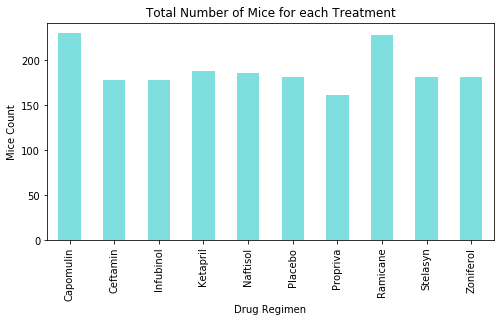

<Figure size 432x288 with 0 Axes>

In [55]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_treated = summary_statistics[['Count']]
mice_treated = mice_treated.rename(columns = {'Count': 'Total Number of Mice'})
mice_treated.plot(kind='bar', figsize=(8,4), color = 'c', alpha=0.5, align='center', legend=False)
plt.title("Total Number of Mice for each Treatment")
plt.ylabel("Mice Count")
plt.show()
plt.tight_layout()

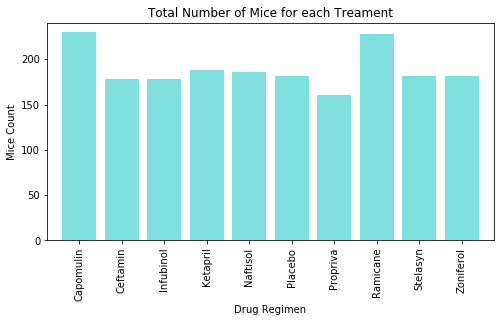

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice_treated))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,4))
plt.bar(x_axis, mice_treated['Total Number of Mice'], color = 'c', alpha=0.5, align='center')
plt.xticks(tick_locations, mice_treated.index.values, rotation='vertical')
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(mice_treated['Total Number of Mice'])+10)
plt.title("Total Number of Mice for each Treament")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.show()

In [24]:
# Calculate gender distribution from the cleaned data
female_group = clean_data.groupby(['Sex']).get_group(('Female'))
female_count = len(female_group['Mouse ID'].unique())
male_group = clean_data.groupby(['Sex']).get_group(('Male'))
male_count = len(male_group['Mouse ID'].unique())
# Display values
gender = {'Gender':[female_count, male_count]}
gender_df = pd.DataFrame(gender, index=['Female', 'Male'])
gender_df

,Gender
Female,123
Male,125


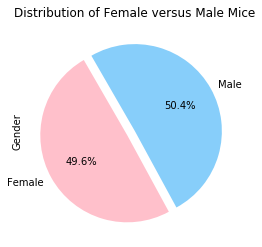

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['pink', 'lightskyblue']
explode = (0.1, 0)
gender_df.plot(kind='pie', labels=gender_df.index.values, autopct='%1.1f%%', startangle=120, 
               subplots=True, legend=False, explode=explode, colors=colors)
plt.title('Distribution of Female versus Male Mice')
plt.show()

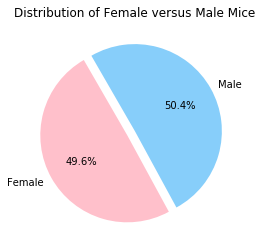

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['pink', 'lightskyblue']
explode = (0.1, 0)
plt.pie(gender_df['Gender'], labels=gender_df.index.values, autopct='%1.1f%%', startangle=120, 
        explode=explode, colors=colors)
plt.title('Distribution of Female versus Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = clean_data.loc[(clean_data['Drug Regimen'] =='Capomulin') | 
                             (clean_data['Drug Regimen'] =='Ramicane') |
                            (clean_data['Drug Regimen'] == 'Infubinol') |
                            (clean_data['Drug Regimen'] == 'Ceftamin'), :]

# Sort drug list data frame by showing first the last(greatest) timepoint with its corresponding Tumor Volume (mm3)
drug_list = drug_list.sort_values(['Drug Regimen', 'Mouse ID','Timepoint'], ascending =False)
drug_list.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
84,z578,Ramicane,Male,11,16,45,30.638696,0
83,z578,Ramicane,Male,11,16,40,34.022093,0
82,z578,Ramicane,Male,11,16,35,38.504824,0
81,z578,Ramicane,Male,11,16,30,37.815935,0
80,z578,Ramicane,Male,11,16,25,37.414114,0


In [ ]:
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [239]:
#pd.set_option('display.max_rows', drug_list2.shape[0]+1)
drug_list2 = drug_list.sort_values(['Drug Regimen', 'Mouse ID','Timepoint'], ascending =False)
drug_list2 = drug_list.drop_duplicates(subset='Mouse ID', keep='first')
#print(drug_list2)
drug_list2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
84,z578,Ramicane,Male,11,16,45,30.638696,0
453,y449,Ramicane,Male,19,24,15,44.183451,0
449,w678,Ramicane,Female,5,24,5,43.166373,0
410,u196,Ramicane,Male,18,25,45,40.667713,3
59,s508,Ramicane,Male,1,17,45,30.276232,0
447,r921,Ramicane,Female,5,25,30,43.419381,1
234,r811,Ramicane,Male,9,19,45,37.225650,1
262,q610,Ramicane,Female,18,21,35,36.561652,2
420,q597,Ramicane,Male,20,25,45,45.220869,2
114,n364,Ramicane,Male,4,17,45,31.095335,1


In [ ]:

last_tumor_size = drug_list.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)
last_tumor_size

In [248]:
# Create a list of the four drugs to examine
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Slice the original combined_data dataframe using the list of four drugs
four_drugs = clean_data[clean_data['Drug Regimen'].isin(four_drug_list)]

# View the newly created subset dataframe
four_drugs.head()

# Groupby 'Mouse ID', use the .agg method and chain a round method to output 3 digits after the zero
last_tumor_size = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)
last_tumor_size

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
             i557               47.686
             i738               37.312
             j119               38.125
             j246               38.753
             l509               41.483
             l897               38.847
             m601               28.431
             m957               33.329
             r157               46.539
             r554               32.377
             r944               41.582
             s185               23.344
             s710               40.729
             t565               34.455
             u364               31.024
             v923               40.658
             w150               39.952
             w914               36.041
             x401               28.484
             y793               31.896
Ceftamin     a275               62.999
             b447               45.000
             b487               56.058
             b759               55.743
             f436               48.722
             h531               47.785
             j296               61.849
             k210               68.923
             l471               67.749
             l490               57.918
             l558               46.785
             l661               59.852
             l733               64.300
             o287               59.742
             p438               61.434
             q483               64.192
             t573               45.000
             u149               52.925
             u153               45.000
             w151               67.527
             x226               45.000
             x581               64.635
             x822               61.387
             y769               68.595
             y865               64.730
Infubinol    a203               67.973
             a251               65.526
             a577               57.032
             a685               66.083
             c139               72.227
             c326               36.321
             c895               60.970
             e476               62.435
             f345               60.919
             i386               67.290
             k483               66.197
             k804               62.117
             m756               47.010
             n671               60.165
             o809               55.629
             o813               45.699
             q132               54.657
             s121               55.651
             v339               46.250
             v719               54.049
             v766               51.542
             w193               50.005
             w584               58.268
             y163               67.686
             z581               62.754
Ramicane     a411               38.408
             a444               43.048
             a520               38.810
             a644               32.979
             c458               38.342
             c758               33.398
             d251               37.311
             e662               40.659
             g791               29.128
             i177               33.562
             i334               36.375
             j913               31.560
             j989               36.135
             k403               22.050
             m546               30.565
             n364               31.095
             q597               45.221
             q610               36.562
             r811               37.226
             r921               43.419
             s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

In [ ]:
# Reshape dataframe with Drug Regimen as columns by using unstack, also move Last_tumor_size to index using stack
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
# View the result to confirm transpose
four_last_tumor_unstack.head()

In [256]:
counter = 0

for drug in drug_list2:
    # Determine quartiles
    quartiles = drug_list2['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Determine upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    if counter == 0:
        print(lowerq)

37.187743802499995
37.187743802499995
37.187743802499995
37.187743802499995
37.187743802499995
37.187743802499995
37.187743802499995
37.187743802499995


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Create a new DataFrame for Capomulin
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
capomulin_data = capomulin_data.reset_index()
capomulin_data.head(1)

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.0,0


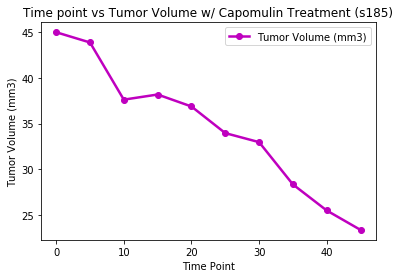

<Figure size 432x288 with 0 Axes>

In [49]:
# Select a mouse that was treated with Capomulin 
s185_mouse = capomulin_data.loc[capomulin_data['Mouse ID'] == "s185"]

# Associate with timepoint versus tumor volume
s185_mouse = s185_mouse.loc[:, ['Timepoint', 'Tumor Volume (mm3)']]
s185_mouse= s185_mouse.reset_index(drop=True)

# Display line plot
s185_mouse.set_index('Timepoint').plot(kind='line', figsize=(6,4), linewidth=2.5, color='m', marker='o', legend=True)
plt.title("Time point vs Tumor Volume w/ Capomulin Treatment (s185)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
plt.tight_layout()

<function matplotlib.pyplot.show(*args, **kw)>

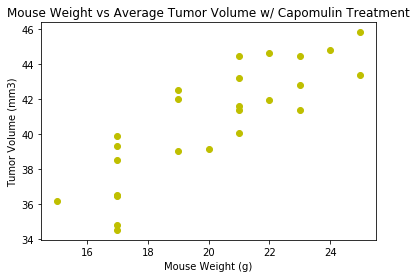

In [57]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen

# Set x & y values
mouse_weight = capomulin_data.groupby(capomulin_data['Mouse ID'])['Weight (g)'].unique()
avg_tumor_volume = capomulin_data.groupby(capomulin_data['Mouse ID'])['Tumor Volume (mm3)'].mean()

# Display scatter plot
plt.scatter(mouse_weight, avg_tumor_volume, color='y')
plt.title("Mouse Weight vs Average Tumor Volume w/ Capomulin Treatment")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show

## Correlation and Regression

In [65]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capomulin_data.groupby(capomulin_data['Mouse ID'])['Weight (g)'].mean()
avg_tumor_volume = capomulin_data.groupby(capomulin_data['Mouse ID'])['Tumor Volume (mm3)'].mean()

correlation = round(st.pearsonr(mouse_weight, avg_tumor_volume)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

The correlation between mouse weight and the average tumor volume is 0.84


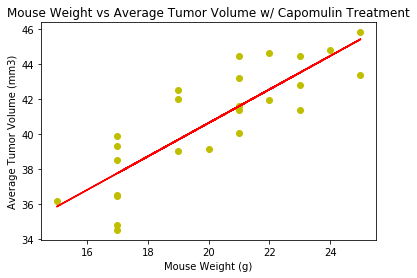

In [67]:
# Calculate the linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, avg_tumor_volume)

regress_value = slope * mouse_weight + intercept

# Display scatter plot with the linear model
x_values = mouse_weight
y_values = avg_tumor_volume
plt.scatter(x_values,y_values, color='y')
plt.plot(x_values, regress_value, 'r-')
plt.title("Mouse Weight vs Average Tumor Volume w/ Capomulin Treatment")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
